In [1]:
import pandas as pd
import numpy as np


# Define the file path
file_path = "/Users/rahmasemma/Downloads/faers_ascii_2024Q4/ASCII/DRUG24Q4.txt"

# Read the data into a pandas DataFrame
drug_df = pd.read_csv(file_path, sep="$",dtype=str)  # Use dtype=str to handle missing values properly

# Display shape and first few rows
print(drug_df.shape)
print(drug_df)



(2030938, 20)
         primaryid    caseid drug_seq role_cod  \
0        100100247  10010024        1       PS   
1        100100247  10010024        2       SS   
2        100100247  10010024        3       SS   
3        100100247  10010024        4       SS   
4        100100247  10010024        5       SS   
...            ...       ...      ...      ...   
2030933   99696784   9969678       12       SS   
2030934   99696784   9969678       13       SS   
2030935   99696784   9969678       14        C   
2030936   99696784   9969678       15        C   
2030937   99696784   9969678       16        C   

                                drugname                          prod_ai  \
0                             ADALIMUMAB                       ADALIMUMAB   
1                             ADALIMUMAB                       ADALIMUMAB   
2                           CYCLOSPORINE                     CYCLOSPORINE   
3                               REMICADE                       INFLIXIMAB   


In [2]:
missing_values = drug_df.isna().mean() * 100

# Display columns with missing percentage
missing_report = pd.DataFrame({'Column': missing_values.index, 'Missing_Percentage': missing_values.values})
missing_report = missing_report.sort_values(by='Missing_Percentage', ascending=False)

# Display the missing values report
print("\nMissing Values Report:\n", missing_report)




Missing Values Report:
            Column  Missing_Percentage
14         exp_dt           99.918363
10  cum_dose_unit           98.171928
9    cum_dose_chr           98.171928
12         rechal           91.248182
19      dose_freq           79.123587
13        lot_num           75.371971
15        nda_num           67.868837
16       dose_amt           58.707405
17      dose_unit           58.707405
18      dose_form           48.967374
11         dechal           40.503354
7           route           31.579546
8        dose_vbm           30.487784
5         prod_ai            1.478627
4        drugname            0.000345
6         val_vbm            0.000000
1          caseid            0.000000
3        role_cod            0.000000
2        drug_seq            0.000000
0       primaryid            0.000000


In [3]:
# Step 2: Drop Irrelevant Columns (Based on Prior Analysis)
columns_to_drop = ['exp_dt', 'cum_dose_chr', 'cum_dose_unit', 'rechal', 'lot_num', 'nda_num', 'val_vbm']
cleaned_drug_df = drug_df.drop(columns=columns_to_drop)

# Step 3: Save Cleaned Drug Data for Future Use
cleaned_drug_df.to_csv('cleaned_DRUGyyQq.csv', index=False)

# Display Cleaned Data Information
print('Cleaned Drug DataFrame Shape:', cleaned_drug_df.shape)
print('Columns in Cleaned Drug DataFrame:', cleaned_drug_df.columns)

Cleaned Drug DataFrame Shape: (2030938, 13)
Columns in Cleaned Drug DataFrame: Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai',
       'route', 'dose_vbm', 'dechal', 'dose_amt', 'dose_unit', 'dose_form',
       'dose_freq'],
      dtype='object')


In [4]:
drug_df[drug_df.primaryid.duplicated()]

,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq
1,100100247,10010024,2,SS,ADALIMUMAB,ADALIMUMAB,1,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,125057,NaN,NaN,NaN,NaN
2,100100247,10010024,3,SS,CYCLOSPORINE,CYCLOSPORINE,1,Unknown,NaN,NaN,NaN,D,NaN,Not Available,NaN,065003,NaN,NaN,NaN,NaN
3,100100247,10010024,4,SS,REMICADE,INFLIXIMAB,1,Intravenous (not otherwise specified),6 infusions at 8 weeks interval,NaN,NaN,Y,NaN,Not Available,NaN,NaN,NaN,NaN,NaN,NaN
4,100100247,10010024,5,SS,ETANERCEPT,ETANERCEPT,1,Subcutaneous,NaN,NaN,NaN,Y,NaN,Not Available,NaN,NaN,100,MG,NaN,/WK
5,100100247,10010024,6,SS,METHOTREXATE,METHOTREXATE,1,Unknown,NaN,NaN,NaN,Y,NaN,Not Available,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030933,99696784,9969678,12,SS,DAPTOMYCIN,DAPTOMYCIN,1,Unknown,"500 mg, Daily",NaN,NaN,Y,NaN,NaN,NaN,NaN,500,MG,NaN,NaN
2030934,99696784,9969678,13,SS,PANTOPRAZOLE SODIUM I.V.,PANTOPRAZOLE SODIUM,1,Unknown,"40 mg, UNK",NaN,NaN,U,U,unk,NaN,NaN,40,MG,Injection,NaN
2030935,99696784,9969678,14,C,ACETAMINOPHEN\CODEINE PHOSPHATE,ACETAMINOPHEN\CODEINE PHOSPHATE,1,Unknown,"500/30 mg, daily",NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030936,99696784,9969678,15,C,METHYLPREDNISOLONE,METHYLPREDNISOLONE,1,Unknown,"80 mg, bid",NaN,NaN,Y,NaN,NaN,NaN,NaN,80,MG,NaN,Q12H


In [5]:
# Finding unique rows based on 'PRIMARYID'
unique_drug_df = cleaned_drug_df.drop_duplicates(subset='primaryid')

# Checking the number of unique rows
print(f"Number of Unique Rows: {unique_drug_df.shape[0]}")

# Optionally, save this unique data to a file
unique_drug_df.to_csv('unique_cleaned_DRUGyyQq.csv', index=False)
unique_drug_df

Number of Unique Rows: 410849


,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,route,dose_vbm,dechal,dose_amt,dose_unit,dose_form,dose_freq
0,100100247,10010024,1,PS,ADALIMUMAB,ADALIMUMAB,Subcutaneous,NaN,Y,40,MG,NaN,QOW
10,100373859,10037385,1,PS,ANASTROZOLE,ANASTROZOLE,Oral,Anastazole pack NO:1040431625896,Y,1,MG,Tablet,QD
18,1016611044,10166110,1,PS,XOLAIR,OMALIZUMAB,Subcutaneous,NaN,U,375,MG,"INJECTION, SOLUTION",QOW
52,101735213,10173521,1,PS,REMICADE,INFLIXIMAB,Intravenous drip,NaN,NaN,NaN,NaN,Solution for infusion,NaN
55,1020101730,10201017,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,Intramuscular,"30 mg, Q4W (every 4 weeks)",Y,30,MG,NaN,/MONTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030907,99198746,9919874,1,PS,GILENYA,FINGOLIMOD HYDROCHLORIDE,Oral,"0.5 mg, QD",Y,0.5,MG,NaN,QD
2030911,99310683,9931068,1,PS,CYCLOSPORINE,CYCLOSPORINE,Oral,UNK,D,NaN,NaN,NaN,NaN
2030915,99310703,9931070,1,PS,CYCLOSPORINE,CYCLOSPORINE,Unknown,UNK,NaN,NaN,NaN,NaN,NaN
2030919,99310743,9931074,1,PS,CYCLOSPORINE,CYCLOSPORINE,Oral,UNK,D,NaN,NaN,NaN,NaN


In [6]:
# Define the file path
file_path = "/Users/rahmasemma/Downloads/faers_ascii_2024Q4/ASCII/REAC24Q4.txt"

# Read the data into a pandas DataFrame
reac_df = pd.read_csv(file_path, sep="$",dtype=str)  # Use dtype=str to handle missing values properly

# Display shape and first few rows
print(reac_df.shape)
reac_df

(1472750, 4)


,primaryid,caseid,pt,drug_rec_act
0,100100247,10010024,Malignant melanoma stage I,NaN
1,100100247,10010024,Keratoacanthoma,NaN
2,100100247,10010024,Blood pressure increased,NaN
3,100100247,10010024,Keratoacanthoma,NaN
4,100100247,10010024,Hyperkeratosis,NaN
...,...,...,...,...
1472745,99310703,9931070,Liver transplant rejection,NaN
1472746,99310703,9931070,Post transplant lymphoproliferative disorder,NaN
1472747,99310743,9931074,Post transplant lymphoproliferative disorder,NaN
1472748,99696784,9969678,Drug reaction with eosinophilia and systemic s...,NaN


In [7]:
missing_values = reac_df.isna().mean() * 100

# Display columns with missing percentage
missing_report = pd.DataFrame({'Column': missing_values.index, 'Missing_Percentage': missing_values.values})
missing_report = missing_report.sort_values(by='Missing_Percentage', ascending=False)

# Display the missing values report
print("\nMissing Values Report:\n", missing_report)



Missing Values Report:
          Column  Missing_Percentage
3  drug_rec_act           99.915464
0     primaryid            0.000000
1        caseid            0.000000
2            pt            0.000000


In [8]:
# Step 2: Drop Irrelevant Columns (Based on Prior Analysis)
columns_to_drop = ['drug_rec_act']
cleaned_reac_df = reac_df.drop(columns=columns_to_drop)

# Step 3: Save Cleaned Drug Data for Future Use
cleaned_reac_df.to_csv('cleaned_reacQq.csv', index=False)

# Display Cleaned Data Information
print('Cleaned reac DataFrame Shape:', cleaned_drug_df.shape)
print('Columns in Cleaned reac DataFrame:', cleaned_drug_df.columns)
cleaned_reac_df

Cleaned reac DataFrame Shape: (2030938, 13)
Columns in Cleaned reac DataFrame: Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai',
       'route', 'dose_vbm', 'dechal', 'dose_amt', 'dose_unit', 'dose_form',
       'dose_freq'],
      dtype='object')


,primaryid,caseid,pt
0,100100247,10010024,Malignant melanoma stage I
1,100100247,10010024,Keratoacanthoma
2,100100247,10010024,Blood pressure increased
3,100100247,10010024,Keratoacanthoma
4,100100247,10010024,Hyperkeratosis
...,...,...,...
1472745,99310703,9931070,Liver transplant rejection
1472746,99310703,9931070,Post transplant lymphoproliferative disorder
1472747,99310743,9931074,Post transplant lymphoproliferative disorder
1472748,99696784,9969678,Drug reaction with eosinophilia and systemic s...


In [9]:
# Finding unique rows based on 'PRIMARYID'
unique_reac_df = cleaned_reac_df.drop_duplicates(subset='primaryid')

# Checking the number of unique rows
print(f"Number of Unique Rows: {unique_reac_df.shape[0]}")

# Optionally, save this unique data to a file
unique_reac_df.to_csv('unique_cleaned_reacQq.csv', index=False)
unique_reac_df

Number of Unique Rows: 410849


,primaryid,caseid,pt
0,100100247,10010024,Malignant melanoma stage I
6,100373859,10037385,Magnesium deficiency
71,1016611044,10166110,Headache
99,101735213,10173521,Gastrointestinal inflammation
100,1020101730,10201017,Wrong technique in product usage process
...,...,...,...
1472739,99198746,9919874,Alanine aminotransferase increased
1472743,99310683,9931068,Kidney transplant rejection
1472745,99310703,9931070,Liver transplant rejection
1472747,99310743,9931074,Post transplant lymphoproliferative disorder


In [10]:
# Define the file path
file_path = "/Users/rahmasemma/Downloads/faers_ascii_2024Q4/ASCII/OUTC24Q4.txt"

# Read the data into a pandas DataFrame
OUTC_df = pd.read_csv(file_path, sep="$",dtype=str)  # Use dtype=str to handle missing values properly

# Display shape and first few rows
print(OUTC_df.shape)
OUTC_df

(308960, 3)


,primaryid,caseid,outc_cod
0,100100247,10010024,OT
1,100373859,10037385,DS
2,100373859,10037385,OT
3,1016611044,10166110,HO
4,1016611044,10166110,OT
...,...,...,...
308955,99310683,9931068,OT
308956,99310703,9931070,DE
308957,99310703,9931070,OT
308958,99310743,9931074,DE


In [11]:
missing_values = OUTC_df.isna().mean() * 100

# Display columns with missing percentage
missing_report = pd.DataFrame({'Column': missing_values.index, 'Missing_Percentage': missing_values.values})
missing_report = missing_report.sort_values(by='Missing_Percentage', ascending=False)

# Display the missing values report
print("\nMissing Values Report:\n", missing_report)



Missing Values Report:
       Column  Missing_Percentage
0  primaryid                 0.0
1     caseid                 0.0
2   outc_cod                 0.0


In [12]:
# Finding unique rows based on 'PRIMARYID'
unique_OUTC_df = OUTC_df.drop_duplicates(subset='primaryid')

# Checking the number of unique rows
print(f"Number of Unique Rows: {unique_OUTC_df.shape[0]}")

# Optionally, save this unique data to a file
unique_OUTC_df.to_csv('unique_reac_df.csv', index=False)
unique_OUTC_df

Number of Unique Rows: 227854


,primaryid,caseid,outc_cod
0,100100247,10010024,OT
1,100373859,10037385,DS
3,1016611044,10166110,HO
5,101735213,10173521,HO
6,1020101730,10201017,HO
...,...,...,...
308953,99198746,9919874,OT
308954,99310683,9931068,DE
308956,99310703,9931070,DE
308958,99310743,9931074,DE


In [13]:
# Merge 1: Reaction + Demo
merged_df_1 = pd.merge(unique_reac_df, unique_drug_df, on='primaryid', how='inner')

# Merge 2: Add Drug data
final_merged_df = pd.merge(merged_df_1, unique_OUTC_df, on='primaryid', how='inner')

# Save to CSV
final_merged_df.to_csv('merged_unique_data.csv', index=False)

# Optional: display the final merged DataFrame
final_merged_df


,primaryid,caseid_x,pt,caseid_y,drug_seq,role_cod,drugname,prod_ai,route,dose_vbm,dechal,dose_amt,dose_unit,dose_form,dose_freq,caseid,outc_cod
0,100100247,10010024,Malignant melanoma stage I,10010024,1,PS,ADALIMUMAB,ADALIMUMAB,Subcutaneous,NaN,Y,40,MG,NaN,QOW,10010024,OT
1,100373859,10037385,Magnesium deficiency,10037385,1,PS,ANASTROZOLE,ANASTROZOLE,Oral,Anastazole pack NO:1040431625896,Y,1,MG,Tablet,QD,10037385,DS
2,1016611044,10166110,Headache,10166110,1,PS,XOLAIR,OMALIZUMAB,Subcutaneous,NaN,U,375,MG,"INJECTION, SOLUTION",QOW,10166110,HO
3,101735213,10173521,Gastrointestinal inflammation,10173521,1,PS,REMICADE,INFLIXIMAB,Intravenous drip,NaN,NaN,NaN,NaN,Solution for infusion,NaN,10173521,HO
4,1020101730,10201017,Wrong technique in product usage process,10201017,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,Intramuscular,"30 mg, Q4W (every 4 weeks)",Y,30,MG,NaN,/MONTH,10201017,HO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227849,99198746,9919874,Alanine aminotransferase increased,9919874,1,PS,GILENYA,FINGOLIMOD HYDROCHLORIDE,Oral,"0.5 mg, QD",Y,0.5,MG,NaN,QD,9919874,OT
227850,99310683,9931068,Kidney transplant rejection,9931068,1,PS,CYCLOSPORINE,CYCLOSPORINE,Oral,UNK,D,NaN,NaN,NaN,NaN,9931068,DE
227851,99310703,9931070,Liver transplant rejection,9931070,1,PS,CYCLOSPORINE,CYCLOSPORINE,Unknown,UNK,NaN,NaN,NaN,NaN,NaN,9931070,DE
227852,99310743,9931074,Post transplant lymphoproliferative disorder,9931074,1,PS,CYCLOSPORINE,CYCLOSPORINE,Oral,UNK,D,NaN,NaN,NaN,NaN,9931074,DE


In [14]:
final_merged_df.drugname.value_counts()

VEDOLIZUMAB         5186
SKYRIZI             3738
RINVOQ              3113
DUPIXENT            3011
INFLECTRA           2643
                    ... 
FLURAZEPAM             1
AMPHETAMINES NOS       1
RUCAPARIB              1
SALBUHEXAL             1
TIPRANAVIR             1
Name: drugname, Length: 4227, dtype: int64

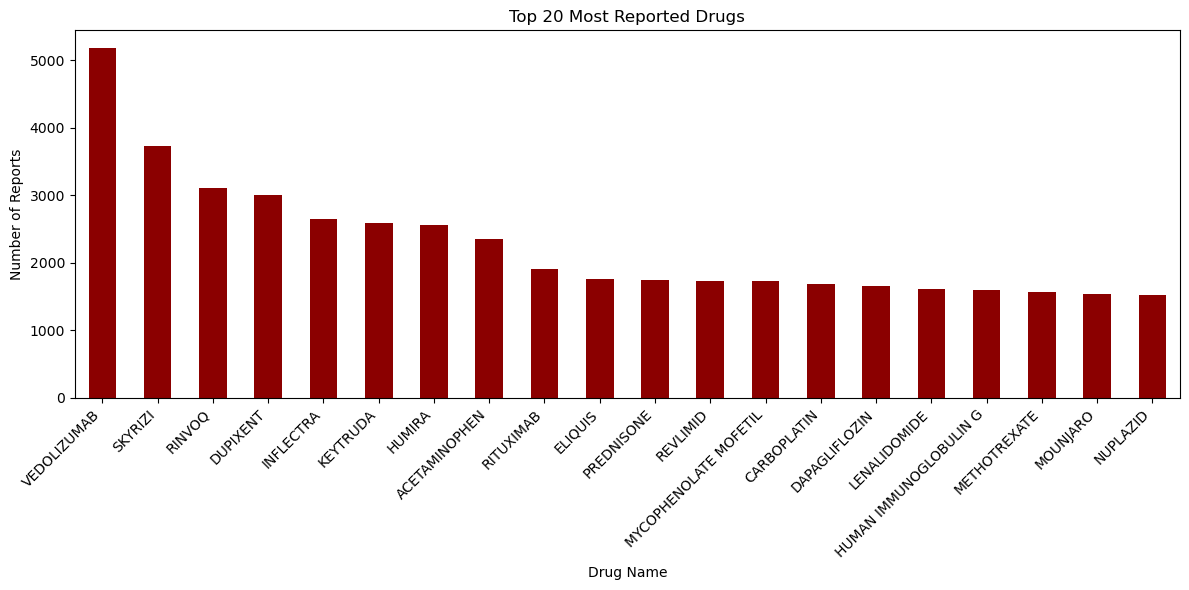

In [15]:
import matplotlib.pyplot as plt

# Get top 20 drugs
top_drugs = final_merged_df['drugname'].value_counts().head(20)

# Plot bar chart
plt.figure(figsize=(12, 6))
top_drugs.plot(kind='bar', color='darkred')
plt.title('Top 20 Most Reported Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
len(drug_df.drugname.unique())

27176

In [17]:
final_merged_df2 = pd.merge(merged_df_1, unique_OUTC_df, on='primaryid', how='inner')
final_merged_df2.to_csv('merged_unique_data.csv', index=False)
# Force conversion again, coerce non-numeric values to NaN
final_merged_df2['dose_amt'] = pd.to_numeric(final_merged_df2['dose_amt'], errors='coerce')

# Check if conversion worked
final_merged_df2['dose_amt'].dtype

dtype('float64')

In [18]:
final_merged_df2.to_csv('merged_unique_data.csv', index=False)
# Force conversion again, coerce non-numeric values to NaN

final_merged_df2['drugname'] = final_merged_df2['drugname'].to_string()
#df['dose_amt'] = df['dose_amt'].astype(str)

# Check if conversion worked
final_merged_df2['drugname'].dtype
#print(temp_df.dtypes)

dtype('O')

In [19]:
# Force conversion again, coerce non-numeric values to NaN
final_merged_df2['outc_cod'] = final_merged_df2['outc_cod'].astype(str)

# Check if conversion worked
final_merged_df2['outc_cod'].dtype

dtype('O')

In [20]:
import pandas as pd

# Step 1: Define relevant columns
categorical_columns = [
    'primaryid', 'caseid_x', 'caseid_y', 'drug_seq', 'caseid',
    'drugname', 'route', 'dose_form', 'dose_freq', 'outc_cod'
]
numerical_columns = ['dose_amt']
selected_columns = categorical_columns + numerical_columns

# Step 2: Create a temporary DataFrame and convert types
temp_df = final_merged_df[selected_columns].copy()

# Convert categorical columns to string
temp_df[categorical_columns] = temp_df[categorical_columns].astype(str)

# Convert numerical columns to float
temp_df[numerical_columns] = temp_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Drop rows with missing values (NaNs)
temp_df_cleaned = temp_df.dropna()

# Step 4: Save cleaned dataset to a new CSV file
temp_df_cleaned.to_csv("cleaned_mixedtype_final_merged.csv", index=False)

# Optional: Confirm by checking types
print(temp_df_cleaned.dtypes)


primaryid     object
caseid_x      object
caseid_y      object
drug_seq      object
caseid        object
drugname      object
route         object
dose_form     object
dose_freq     object
outc_cod      object
dose_amt     float64
dtype: object


# Top Drugs and Reactions

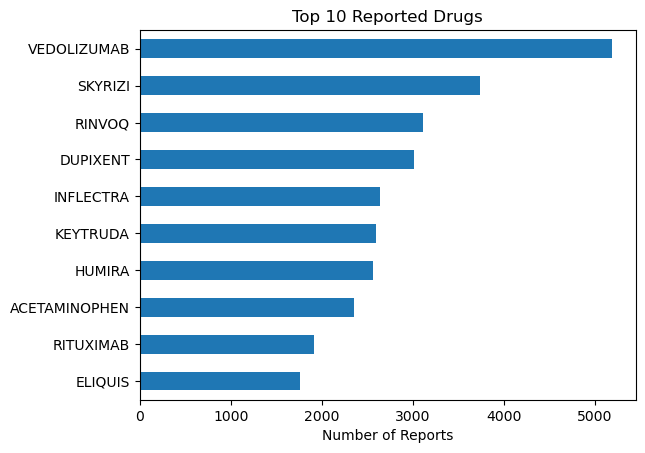

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 reported drugs
top_drugs = final_merged_df['drugname'].value_counts().head(10)
top_drugs.plot(kind='barh')
plt.title('Top 10 Reported Drugs')
plt.xlabel('Number of Reports')
plt.gca().invert_yaxis()
plt.show()


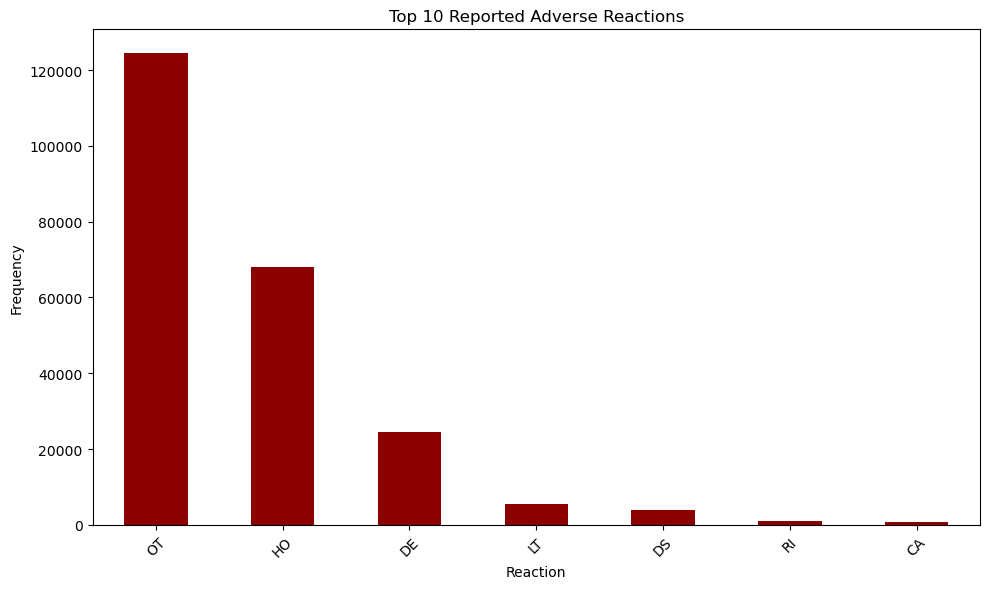

In [22]:
top_reactions = final_merged_df['outc_cod'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_reactions.plot(kind='bar', color='darkred')
plt.title('Top 10 Reported Adverse Reactions')
plt.xlabel('Reaction')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

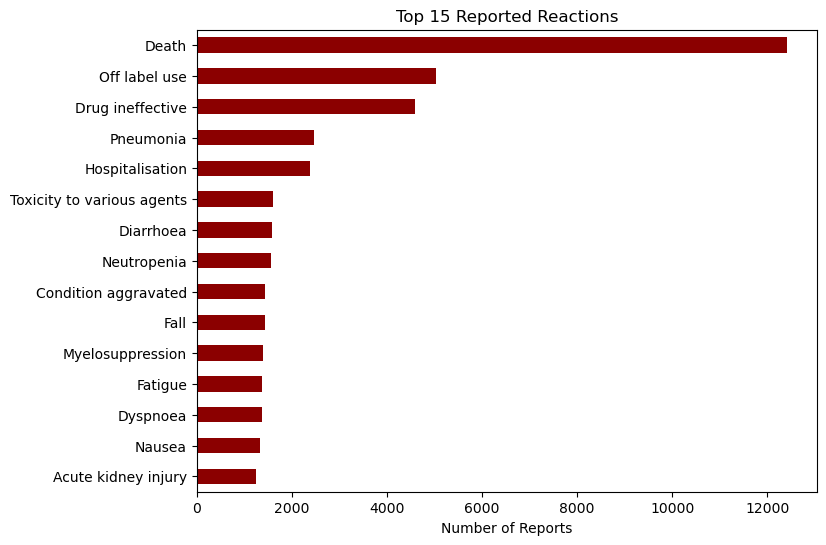

In [23]:
top_reactions = final_merged_df['pt'].value_counts().head(15)
top_reactions.plot(kind='barh', color='darkred', figsize=(8, 6))
plt.title('Top 15 Reported Reactions')
plt.xlabel('Number of Reports')
plt.gca().invert_yaxis()
plt.show()

# 3. Outcome Distribution

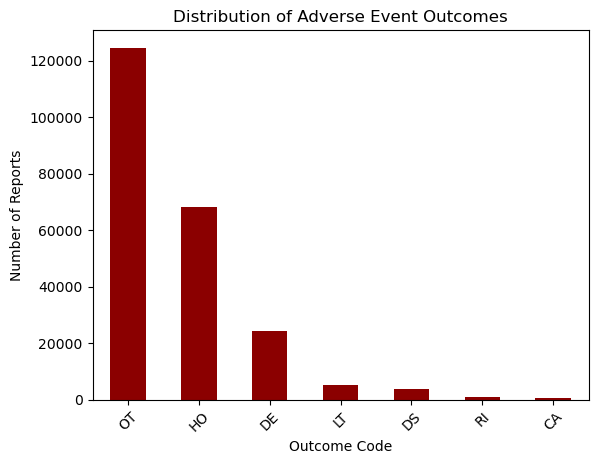

In [24]:
final_merged_df['outc_cod'].value_counts().plot(kind='bar', color='darkred')
plt.title('Distribution of Adverse Event Outcomes')
plt.xlabel('Outcome Code')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.show()

# 4. Top Drugs Associated with Death (or other outcomes)

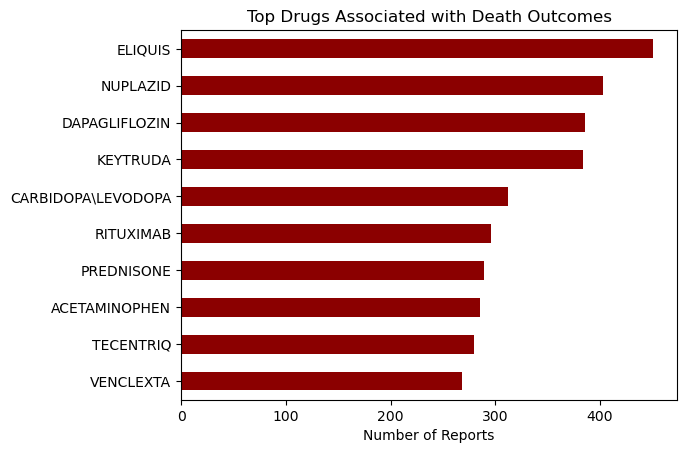

In [25]:
death_df = final_merged_df[final_merged_df['outc_cod'] == 'DE']
top_death_drugs = death_df['drugname'].value_counts().head(10)

top_death_drugs.plot(kind='barh', color='darkred')
plt.title('Top Drugs Associated with Death Outcomes')
plt.xlabel('Number of Reports')
plt.gca().invert_yaxis()
plt.show()

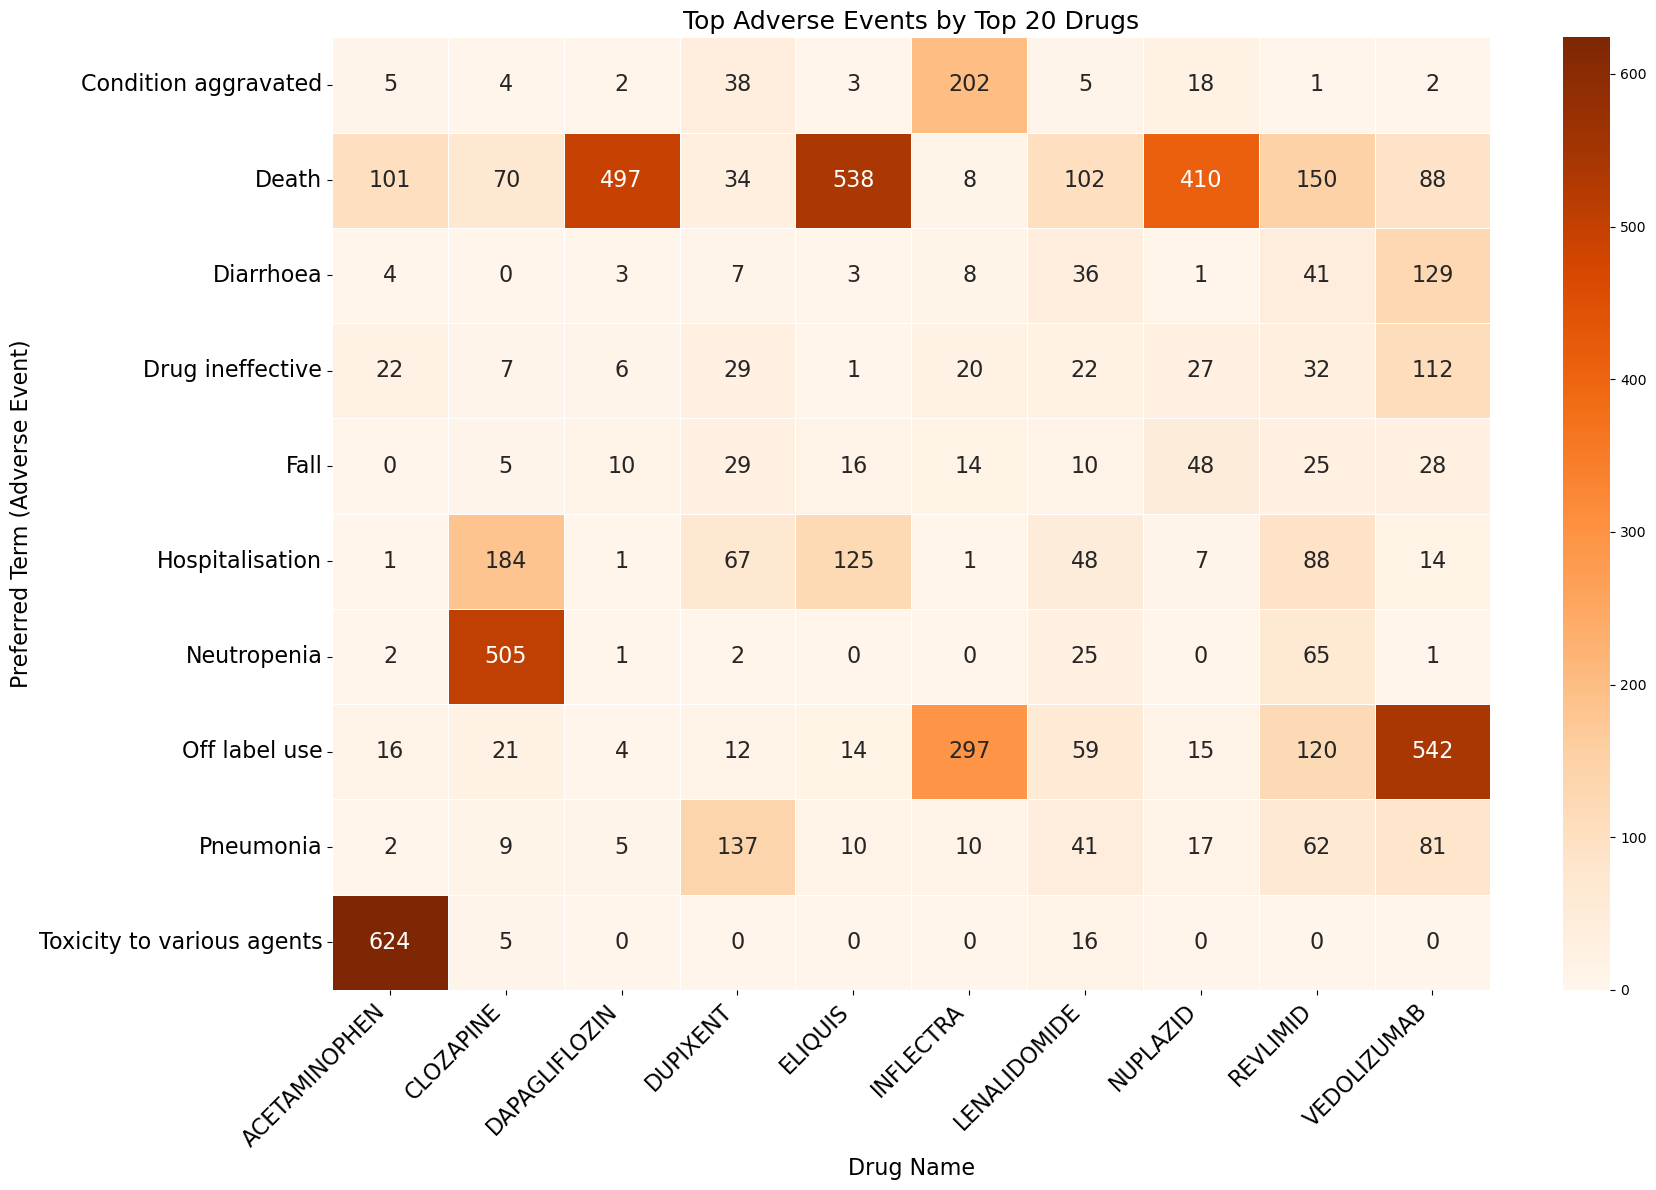

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Top 20 preferred terms and drugs
top_pts = final_merged_df['pt'].value_counts().head(10).index
filtered_df = final_merged_df[final_merged_df['pt'].isin(top_pts)]

top_drugs = filtered_df['drugname'].value_counts().head(10).index
filtered_df = filtered_df[filtered_df['drugname'].isin(top_drugs)]

# Pivot to matrix
heatmap_data = filtered_df.pivot_table(
    index='pt',
    columns='drugname',
    aggfunc='size',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(18, 12))  # Bigger for poster
sns.heatmap(
    heatmap_data,
    cmap="Oranges",
    linewidths=0.5,
    annot=True,
    fmt='g',
    annot_kws={'size': 16}  # Bigger cell text
)

plt.title("Top Adverse Events by Top 20 Drugs", fontsize=18)
plt.xlabel("Drug Name", fontsize=16)
plt.ylabel("Preferred Term (Adverse Event)", fontsize=16)

# Bigger tick labels
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()


In [28]:
import pandas as pd

#data = {'out_cod': ['red', 'blue', 'green', 'red']}
#final_merged_df = pd.DataFrame(data)

encoded_df = pd.get_dummies(final_merged_df, columns = ['outc_cod'])
print(encoded_df)

         primaryid  caseid_x  \
0        100100247  10010024   
1        100373859  10037385   
2       1016611044  10166110   
3        101735213  10173521   
4       1020101730  10201017   
...            ...       ...   
227849    99198746   9919874   
227850    99310683   9931068   
227851    99310703   9931070   
227852    99310743   9931074   
227853    99696784   9969678   

                                                       pt  caseid_y drug_seq  \
0                              Malignant melanoma stage I  10010024        1   
1                                    Magnesium deficiency  10037385        1   
2                                                Headache  10166110        1   
3                           Gastrointestinal inflammation  10173521        1   
4                Wrong technique in product usage process  10201017        1   
...                                                   ...       ...      ...   
227849                 Alanine aminotransferase increas

In [29]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Sample data
data = np.array([['DE'], ['HO'], ['OT'], ['DE']])

# Initialize encoder
encoder = OneHotEncoder()

# Fit and transform
encoded_data = encoder.fit_transform(data).toarray()

# Optional: Get column labels
labels = encoder.get_feature_names_out(['outc_cod'])

# Convert to DataFrame for readability
encoded_df = pd.DataFrame(encoded_data, columns=labels)

print(encoded_df)


   outc_cod_DE  outc_cod_HO  outc_cod_OT
0          1.0          0.0          0.0
1          0.0          1.0          0.0
2          0.0          0.0          1.0
3          1.0          0.0          0.0


In [30]:
data = final_merged_df['outc_cod'].dropna().tolist()  # Drop NaN to avoid errors

# Preserve original category order
unique_categories = list(dict.fromkeys(data))

# Perform manual one-hot encoding
encoded_data = []
for item in data:
    encoded_row = [0] * len(unique_categories)
    index = unique_categories.index(item)
    encoded_row[index] = 1
    encoded_data.append(encoded_row)

# Convert to DataFrame for readability
import pandas as pd
encoded_df = pd.DataFrame(encoded_data, columns=unique_categories)

print(encoded_df.head())



   OT  DS  HO  DE  LT  CA  RI
0   1   0   0   0   0   0   0
1   0   1   0   0   0   0   0
2   0   0   1   0   0   0   0
3   0   0   1   0   0   0   0
4   0   0   1   0   0   0   0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define target variable (binary outcome)
final_merged_df['is_serious'] = final_merged_df['outc_cod'].isin(['DE', 'HO']).astype(int)

# One-hot encode categorical features (drugname, pt, outc_cod)
encoded_df = pd.get_dummies(final_merged_df[['drugname', 'pt', 'outc_cod']], drop_first=True)

# Define features (X) and target (Y)
X = encoded_df
y = final_merged_df['is_serious']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


In [ ]:
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

# Top 10 outcome-related features driving prediction
print(coef_df[coef_df['feature'].str.contains('outc_cod')].head(10))


In [ ]:
import matplotlib.pyplot as plt

# Filter for outcome code features
outcome_features = coef_df[coef_df['feature'].str.contains('outc_cod')]

plt.figure(figsize=(10, 6))
bars = plt.barh(
    outcome_features['feature'],
    outcome_features['coefficient'],
    color='#FF6F61'  # Clean coral/orange tone
)

plt.xlabel("Logistic Regression Coefficient", fontsize=14)
plt.title("Impact of Outcome Codes on Seriousness Prediction", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Annotate bars with values
for bar in bars:
    plt.text(
        bar.get_width() + 0.3 * (1 if bar.get_width() > 0 else -1),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.2f}',
        va='center',
        ha='left' if bar.get_width() > 0 else 'right',
        fontsize=12,
        color='black'
    )

plt.tight_layout()
plt.savefig("outcome_code_coefficients.png", dpi=300, bbox_inches='tight')
plt.show()


In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Target: serious outcome (DE or HO)
final_merged_df['is_serious'] = final_merged_df['outc_cod'].isin(['DE', 'HO']).astype(int)

# Binary feature: is this PT 'Drug ineffective'?
final_merged_df['has_drug_ineffective'] = (final_merged_df['pt'] == 'Drug ineffective').astype(int)

# Define x and y (reshape x for sklearn)
x = final_merged_df['has_drug_ineffective'].values.reshape(-1, 1)
y = final_merged_df['is_serious'].values

# Train logistic regression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

# Predict probabilities
x_range = np.linspace(0, 1, 100).reshape(-1, 1)
probs = model.predict_proba(x_range)[:, 1]
#probs


# Classification results
print(classification_report(y, model.predict(x), zero_division=0))
#confusion_matrix(y, model.predict(x))


              precision    recall  f1-score   support

           0       0.59      1.00      0.75    135409
           1       0.00      0.00      0.00     92445

    accuracy                           0.59    227854
   macro avg       0.30      0.50      0.37    227854
weighted avg       0.35      0.59      0.44    227854



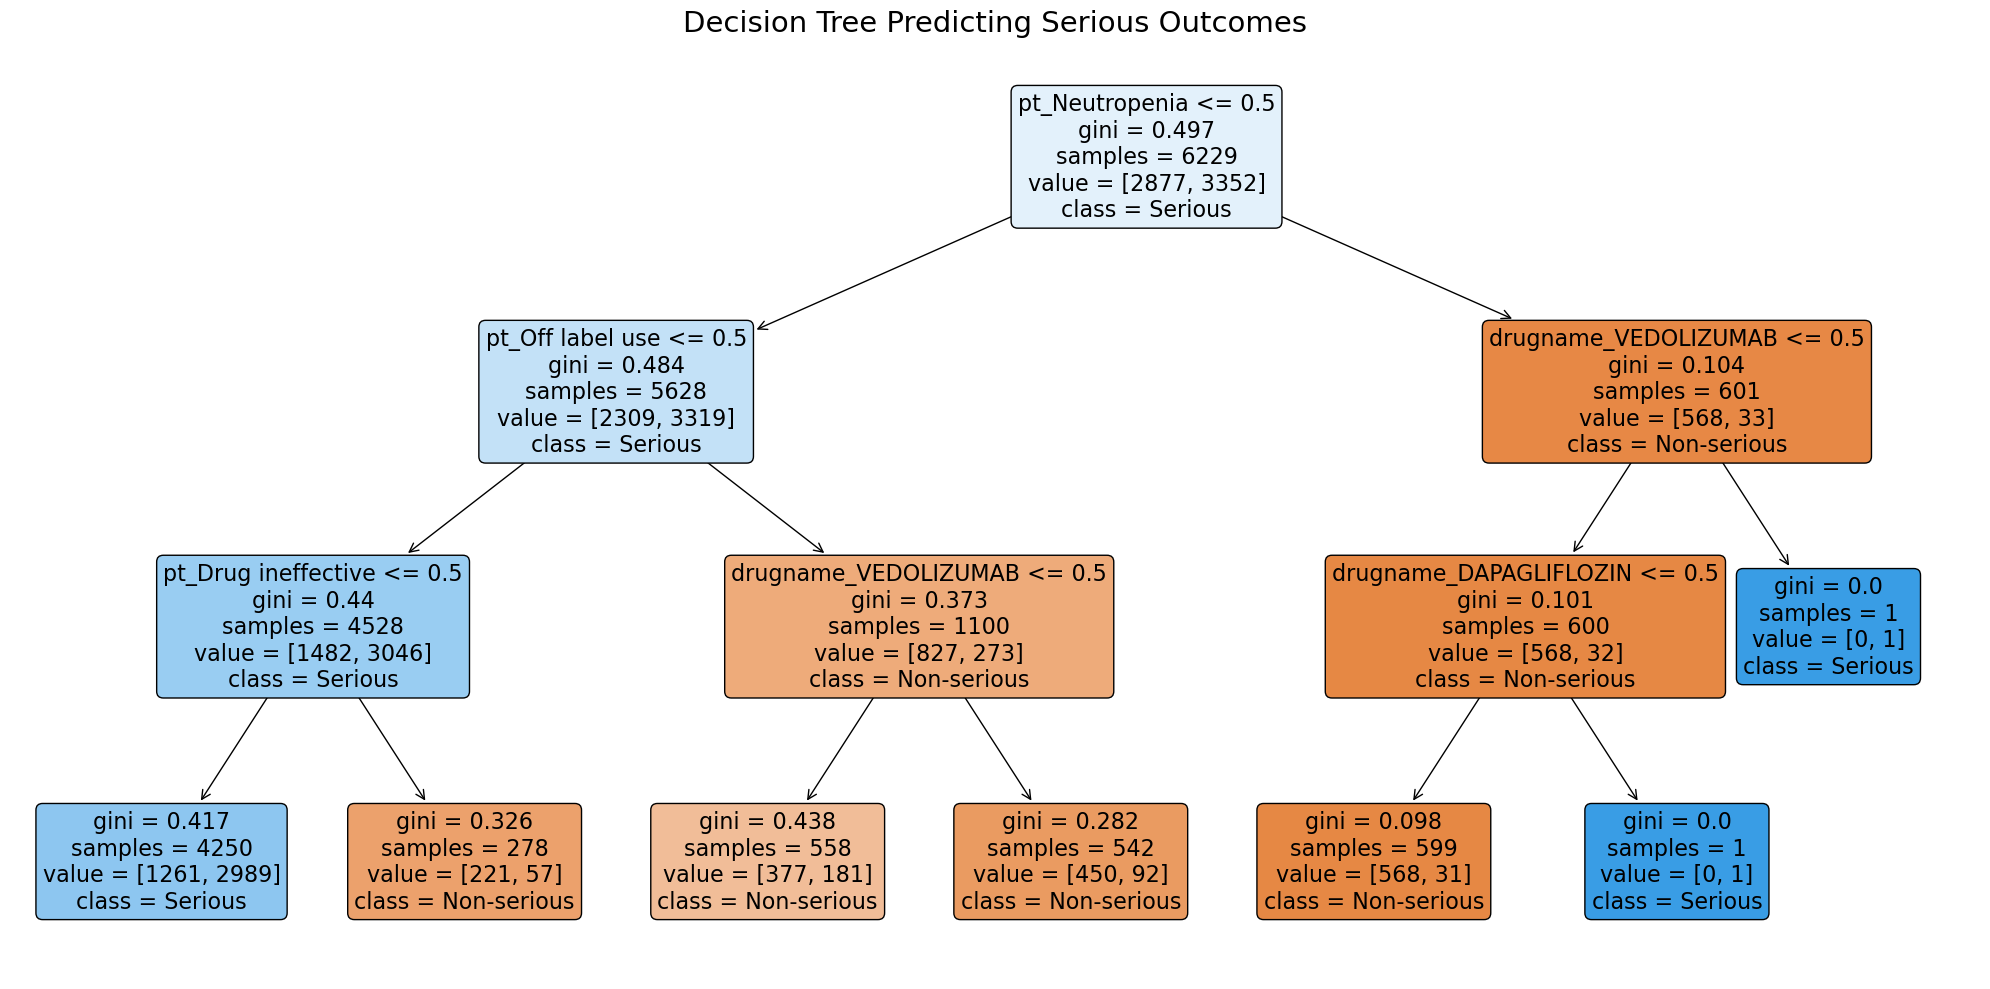

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Optional: ensure clean copy of filtered_df
filtered_df = filtered_df.copy()

# Step 1: Create target variable (serious = DE or HO)
filtered_df['is_serious'] = filtered_df['outc_cod'].isin(['DE', 'HO']).astype(int)

# Step 2: One-hot encode drugname and pt
X = pd.get_dummies(filtered_df[['drugname', 'pt']], drop_first=True)
y = filtered_df['is_serious']

# Step 3: Train the decision tree classifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

# Step 4: Plot the tree with cleaned feature names
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=list(X.columns),  # ✅ FIXED: convert to list
    class_names=['Non-serious', 'Serious'],
    filled=True,
    rounded=True,
    fontsize=16
)
plt.title("Decision Tree Predicting Serious Outcomes", fontsize=21)
plt.tight_layout()
plt.show()


In [ ]:
!pip install pydotplus

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      8186
           1       0.18      0.70      0.29       864

    accuracy                           0.67      9050
   macro avg       0.57      0.68      0.53      9050
weighted avg       0.88      0.67      0.73      9050

Confusion Matrix:
[[5418 2768]
 [ 255  609]]

Drug Effects on Death Odds:
                               Drug  Effect on Death Odds
3                  drugname_ELIQUIS              0.925629
12                drugname_NUPLAZID              0.923345
1            drugname_DAPAGLIFLOZIN              0.855472
13              drugname_PREDNISONE              0.377663
7                 drugname_KEYTRUDA              0.245929
16               drugname_RITUXIMAB              0.208791
11   drugname_MYCOPHENOLATE MOFETIL             -0.093909
8             drugname_LENALIDOMIDE             -0.117060
14                drugname_REVLIMID             -0.344

<Figure size 1000x600 with 0 Axes>

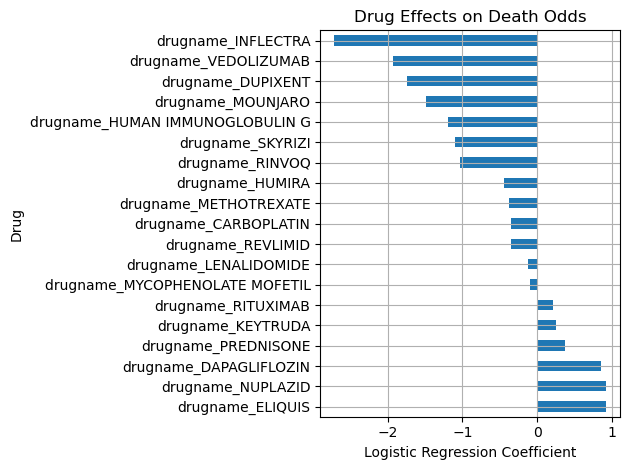

In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Filter top 20 drugs
top_20 = final_merged_df['drugname'].value_counts().head(20).index
df = final_merged_df[final_merged_df['drugname'].isin(top_20)].copy()

# Step 2: Create target variable: 1 if outcome is DE (death), else 0
df['is_death'] = (df['outc_cod'] == 'DE').astype(int)

# Step 3: One-hot encode drug names
encoder = OneHotEncoder(drop='first')  # Avoid dummy variable trap
drug_encoded = encoder.fit_transform(df[['drugname']]).toarray()
drug_labels = encoder.get_feature_names_out(['drugname'])

# Step 4: Create X and y
X = pd.DataFrame(drug_encoded, columns=drug_labels)
y = df['is_death']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Fit logistic regression with class_weight='balanced'
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Evaluation
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 8: Show drug coefficients
coef_df = pd.DataFrame({'Drug': drug_labels, 'Effect on Death Odds': model.coef_[0]})
coef_df = coef_df.sort_values('Effect on Death Odds', ascending=False)
print("\nDrug Effects on Death Odds:")
print(coef_df)

# Optional: Plot top/bottom contributors
plt.figure(figsize=(10, 6))
coef_df.set_index('Drug').plot(kind='barh', legend=False)
plt.title('Drug Effects on Death Odds')
plt.xlabel('Logistic Regression Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


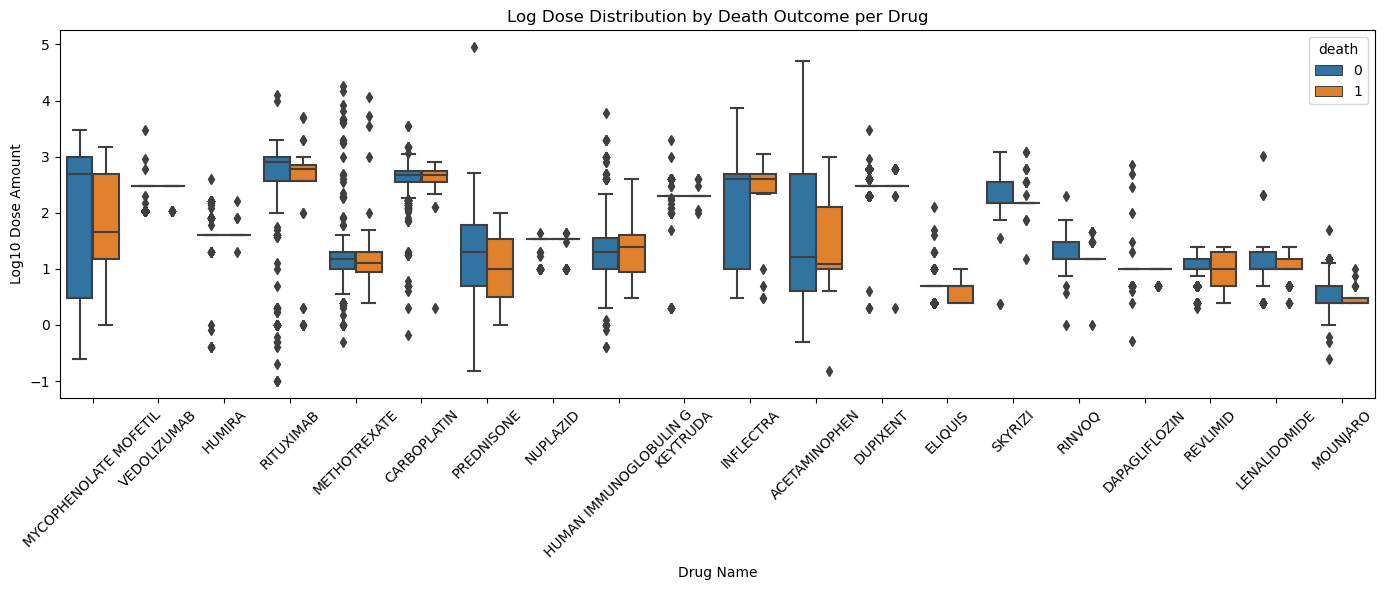

In [39]:
# Add log-transformed dose column (avoid log(0) by filtering first)
df_top20['log_dose'] = np.log10(df_top20['dose_amt'])

# Plot using log scale
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top20, x='drugname', y='log_dose', hue='death')
plt.xticks(rotation=45)
plt.title('Log Dose Distribution by Death Outcome per Drug')
plt.ylabel('Log10 Dose Amount')
plt.xlabel('Drug Name')
plt.tight_layout()
plt.show()
